## Bu ödevde de Öğrencilerin Sınav Performansı'na ait verileri kullanacaksınız.

### Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students = pd.read_csv("StudentsPerformance.csv")

In [4]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


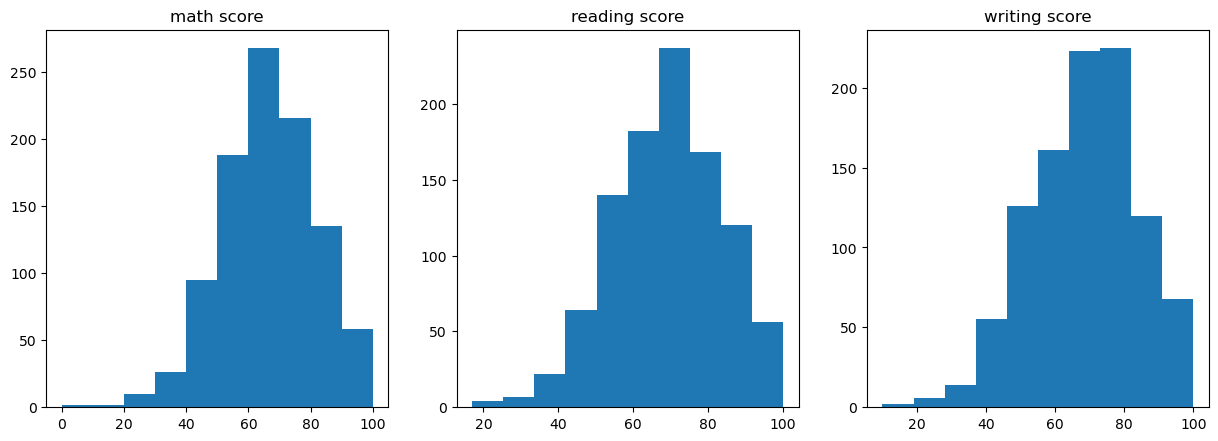

In [5]:
#Sonuçları histogram grafiğinde inceleyelim
results = ["math score","reading score","writing score"]

plt.figure(figsize=(15,5),dpi=100)
count = 1
for result in results:
    plt.subplot(1,3,count)
    plt.hist(students[result])
    plt.title(result)
    count +=1


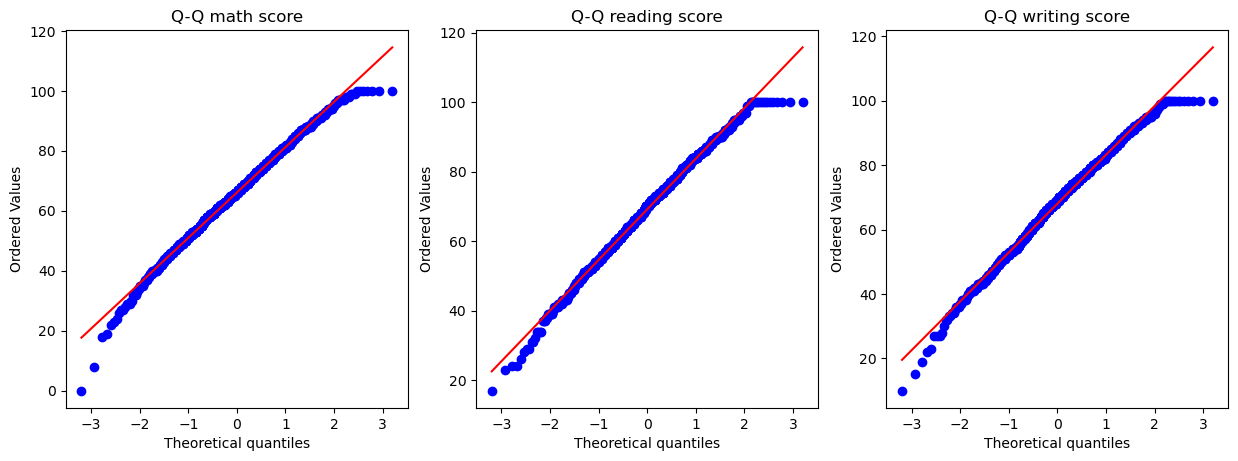

In [6]:
#Q-Q grafiğinde inceleyelim
from scipy import stats
count = 1
plt.figure(figsize=(15,5),dpi=100)
for result in results:
    plt.subplot(1,3,count)
    res = stats.probplot(students[result], plot=plt)
    plt.title("Q-Q "+result)
    count += 1

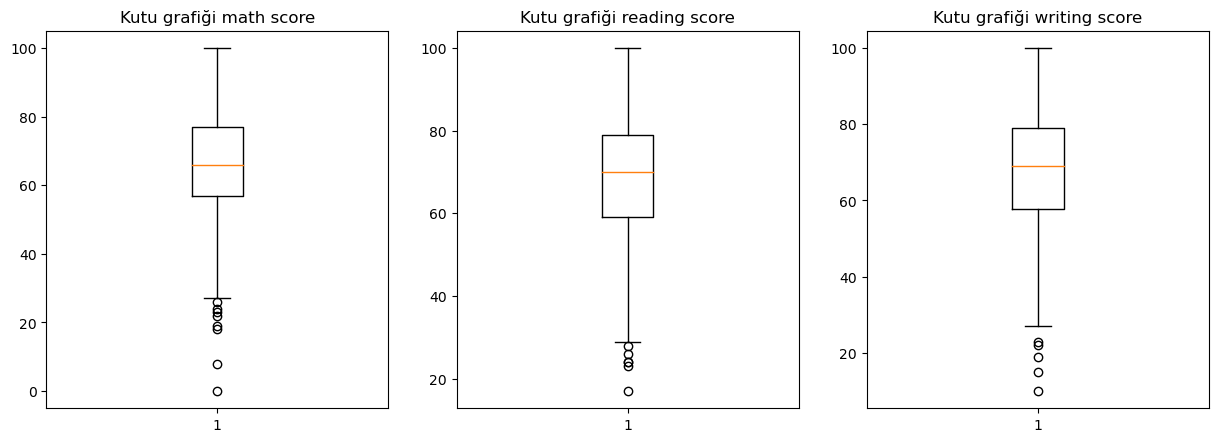

In [7]:
#Aykırı değerlere bakalım
count = 1
plt.figure(figsize=(15,5),dpi=100)
for result in results:
    plt.subplot(1,3,count)
    plt.boxplot(students[result])
    plt.title("Kutu grafiği "+result)
    count += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x19e2fb2b280>,
 'caps': [<matplotlib.lines.Line2D at 0x19e2fb2b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e2fb1eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x19e2fb36040>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e2fb363a0>],
 'means': []}

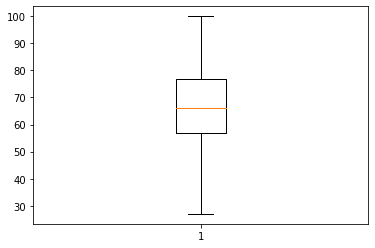

In [8]:
#Aykırı değerleri winsorize ederek inceleyelim
from scipy.stats.mstats import winsorize

winsorized_math = winsorize(students["math score"],(0.008, 0))
plt.boxplot(winsorized_math)



{'whiskers': [<matplotlib.lines.Line2D at 0x19e304c20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19e304c2790>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e304b2d30>],
 'medians': [<matplotlib.lines.Line2D at 0x19e304c2e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e304cd1f0>],
 'means': []}

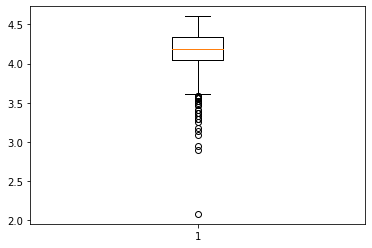

In [9]:
#Aykırı değerleri log alarak inceleyelim

#Değeri 0 olanları çıkardık, log alacağımız için 
log_students = students.loc[lambda df: students["math score"] != 0]

logged_math = np.log(log_students["math score"])
plt.boxplot(logged_math)

{'whiskers': [<matplotlib.lines.Line2D at 0x19e30b79ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x19e2fa0d4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e30b797c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19e2fa0dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e2fa0d1c0>],
 'means': []}

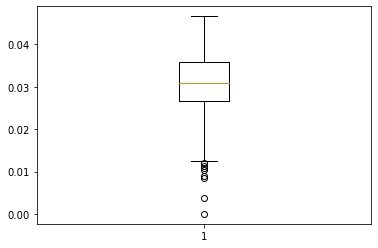

In [10]:
#Normalize ederek bakalım
from sklearn.preprocessing import normalize

normalized_math = normalize(np.array(students["math score"]).reshape(1,-1)).reshape(-1,1)

plt.boxplot(normalized_math)

Text(0.5, 1.0, 'Orjinal')

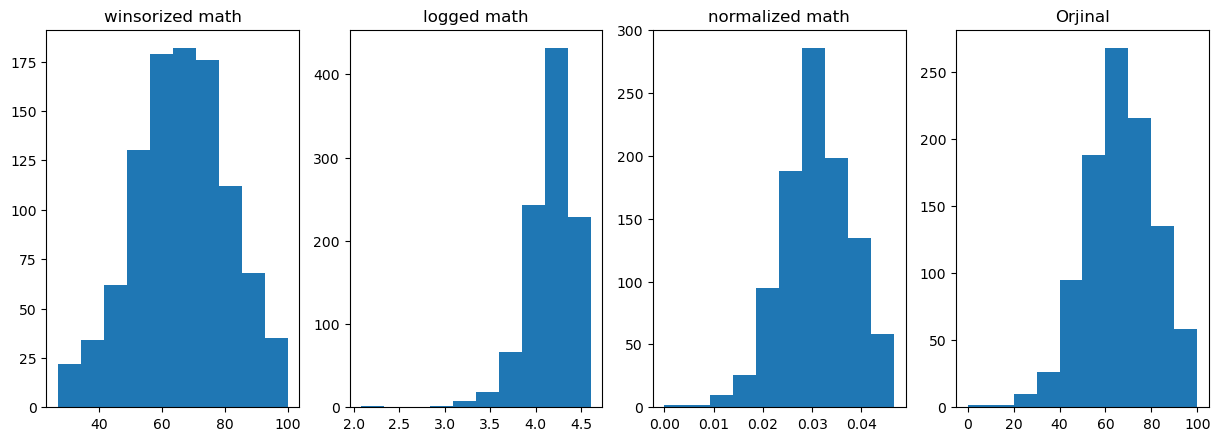

In [11]:
#Hepsine histogram grafiğinde bakalım

plt.figure(figsize=(15,5),dpi=100)

plt.subplot(1,4,1)
plt.hist(winsorized_math)
plt.title("winsorized math")

plt.subplot(1,4,2)
plt.hist(logged_math)
plt.title("logged math")

plt.subplot(1,4,3)
plt.hist(normalized_math)
plt.title("normalized math")

plt.subplot(1,4,4)
plt.hist(students["math score"])
plt.title("Orjinal")

## Math score u normal dağılmış veriyle kıyaslayalım

### Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [12]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
students["sınav ortalaması"] = (students["math score"] + students["reading score"] + students["writing score"])/3

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

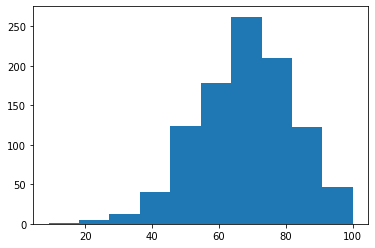

In [14]:
#Yeni ortalamanın dağılımına bakalım
plt.hist(students["sınav ortalaması"])

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([0.00410966, 0.00826499, 0.01242031, 0.01657563, 0.02073096,
        0.02488628, 0.02904161, 0.03319693, 0.03735225, 0.04150758,
        0.0456629 ]),
 <BarContainer object of 10 artists>)

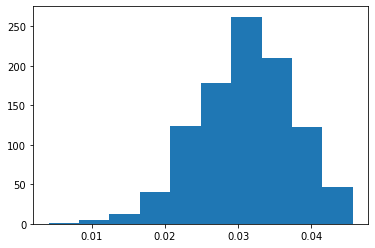

In [15]:
plt.hist(normalize(np.array(students["sınav ortalaması"]).reshape(1,-1)).reshape(-1,1))b

In [20]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sınav ortalaması
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


## Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [19]:
display(students.corr())
#Sürekli değişkenleri sınav ortalamasıyla karşılaştıralım

,math score,reading score,writing score,sınav ortalaması
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
sınav ortalaması,0.918746,0.970331,0.965667,1.000000


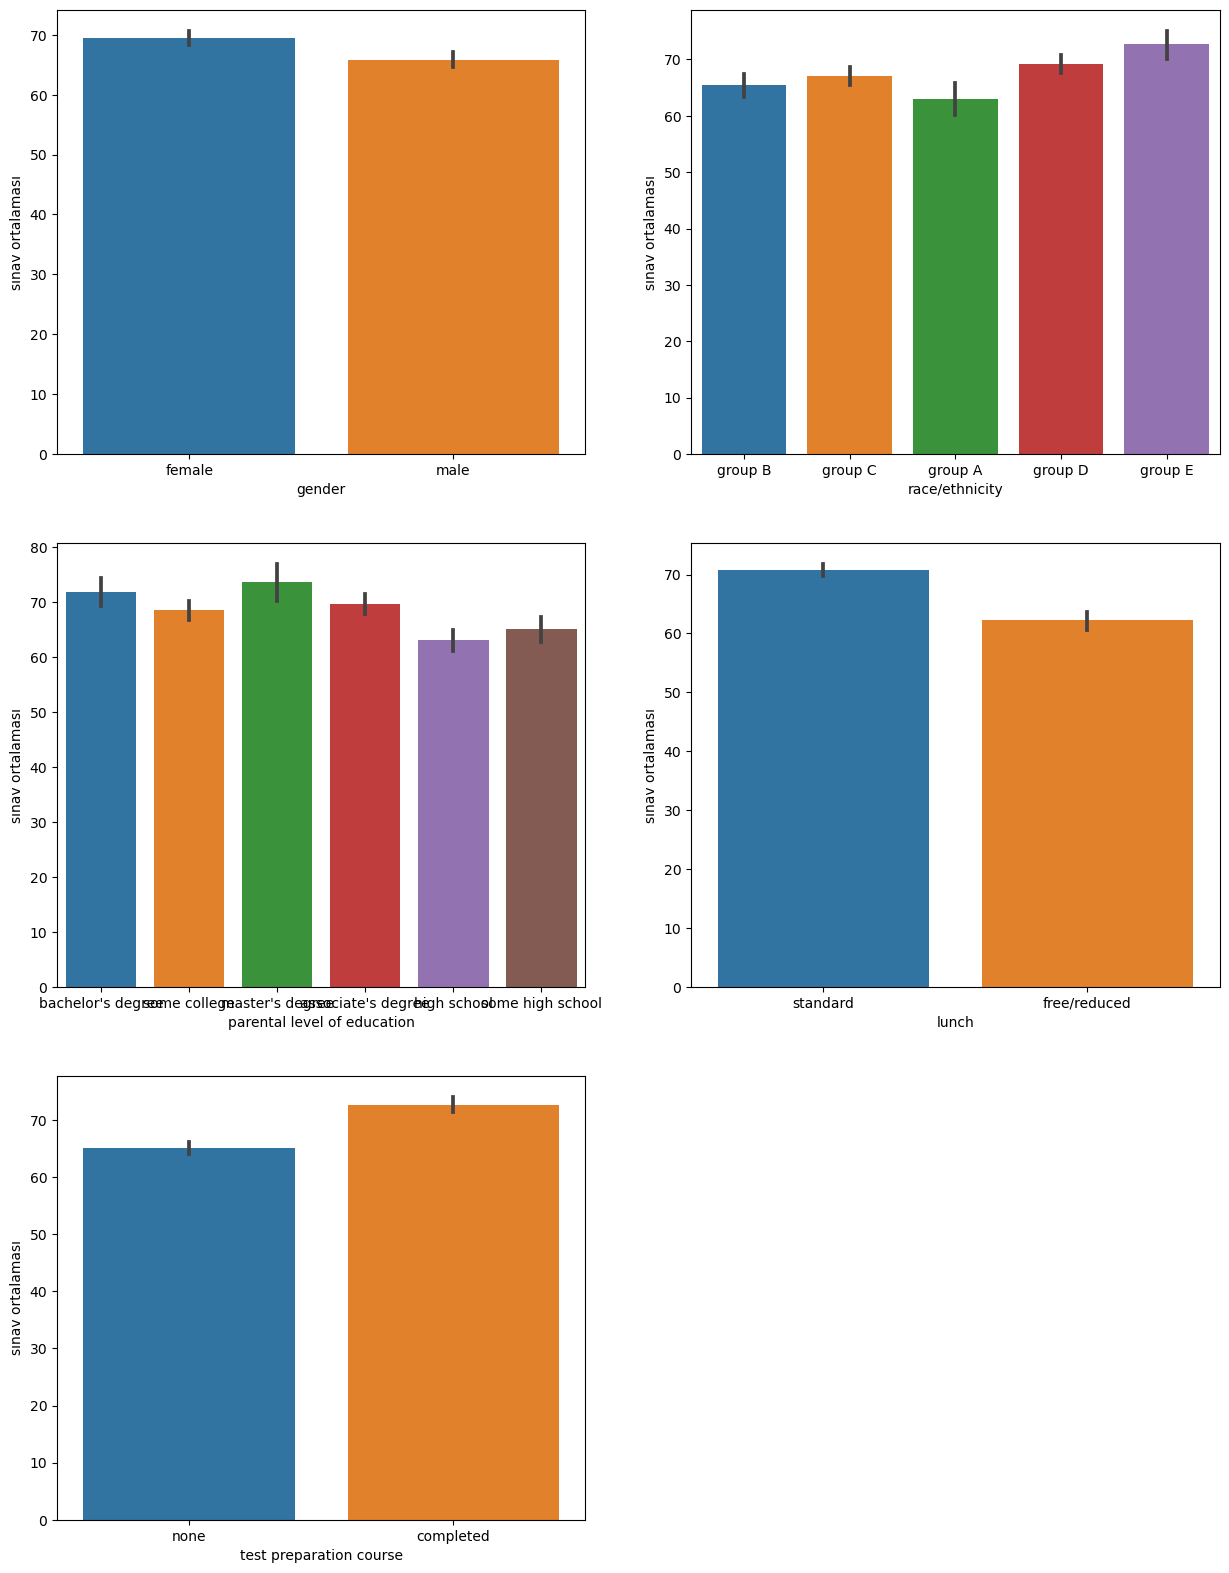

In [89]:
values = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
plt.figure(figsize=(15,20),dpi=100)
count = 1
for value in values:
    plt.subplot(3,2,count)
    sns.barplot(x= students[value],y= students["sınav ortalaması"])
    count += 1